In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits

In [5]:
digits = load_digits()

In [22]:
# X
X = digits.data   #1797 rows , 64 (8 by 8) size


In [15]:
# X
digits.data.shape   #1797 rows , 64 (8 by 8) size


In [21]:
# y
y = digits.target   # only labels 

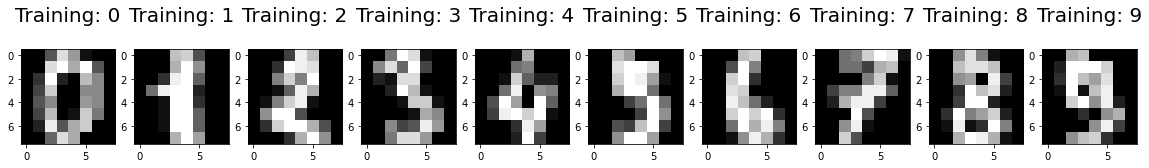

In [19]:
plt.figure(figsize=(20,4))
for index,(image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1,10,index +1)
    plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [20]:
# split data
from sklearn.model_selection import train_test_split

In [23]:
X_train , X_test, y_train ,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [24]:
X_train.shape

(1437, 64)

In [25]:
X_test.shape

(360, 64)

In [26]:
from sklearn.linear_model import LogisticRegression

In [28]:
log_reg = LogisticRegression().fit(X_train,y_train)
log_reg

C:\Users\Gulfam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
y_predict = log_reg.predict(X_test)

In [37]:
# accuracy
from sklearn.metrics import accuracy_score

In [38]:
score = accuracy_score(y_test, y_predict)

In [39]:
score

0.9666666666666667

In [40]:
# confusion metrix
from sklearn.metrics import confusion_matrix

In [41]:
CS = confusion_matrix(y_test, y_predict)

In [42]:
CS

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]], dtype=int64)

In [44]:
# miss classified labels

index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, y_predict):
    if label != predict:
        misclassifiedIndexes.append(index)
        index +=1 
misclassifiedIndexes



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]